<a href="https://colab.research.google.com/github/Nithin061/deep_learning_cv/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2 : Convolution with Padding, Strides, Conv on Multi Channel Images

### 1 : Create an image X that contains diagonal edges (i.e., a matrix where the values form a diagonal pattern). Now apply a kernel K(choose any) to this image. Answer the following sub-questions:

* What happens to the image X when the kernel K is applied? Explain the result.
* What happens if you transpose the image X before applying the kernel K? How does this affect the result?
* What happens if you transpose the kernel K and apply it to the original image X? What differences do you observe compared to applying the original kernel?

### Solution

In [2]:
!wget -O diagonal_stripes_pattern.jpg "https://image.shutterstock.com/image-vector/black-white-diagonal-stripes-pattern-260nw-1932583061.jpg"
!wget -O diagonal_stripes_pattern_1.jpg "https://media.istockphoto.com/id/528685339/vector/seamless-pattern.jpg?s=612x612&w=0&k=20&c=0JGLEXv5HPfl2GkTEOlcLg5VEpoD2i55Fh-5AU1ZfIA="

--2024-11-15 10:13:10--  https://image.shutterstock.com/image-vector/black-white-diagonal-stripes-pattern-260nw-1932583061.jpg
Resolving image.shutterstock.com (image.shutterstock.com)... 99.86.38.49, 99.86.38.30, 99.86.38.108, ...
Connecting to image.shutterstock.com (image.shutterstock.com)|99.86.38.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63687 (62K) [image/jpeg]
Saving to: ‘diagonal_stripes_pattern.jpg’

diagonal_stripes_pa 100%[===================>]  62.19K  --.-KB/s    in 0.01s   

2024-11-15 10:13:10 (5.28 MB/s) - ‘diagonal_stripes_pattern.jpg’ saved [63687/63687]

--2024-11-15 10:13:10--  https://media.istockphoto.com/id/528685339/vector/seamless-pattern.jpg?s=612x612&w=0&k=20&c=0JGLEXv5HPfl2GkTEOlcLg5VEpoD2i55Fh-5AU1ZfIA=
Resolving media.istockphoto.com (media.istockphoto.com)... 3.163.165.72, 3.163.165.18, 3.163.165.44, ...
Connecting to media.istockphoto.com (media.istockphoto.com)|3.163.165.72|:443... connected.
HTTP request sent, awaitin

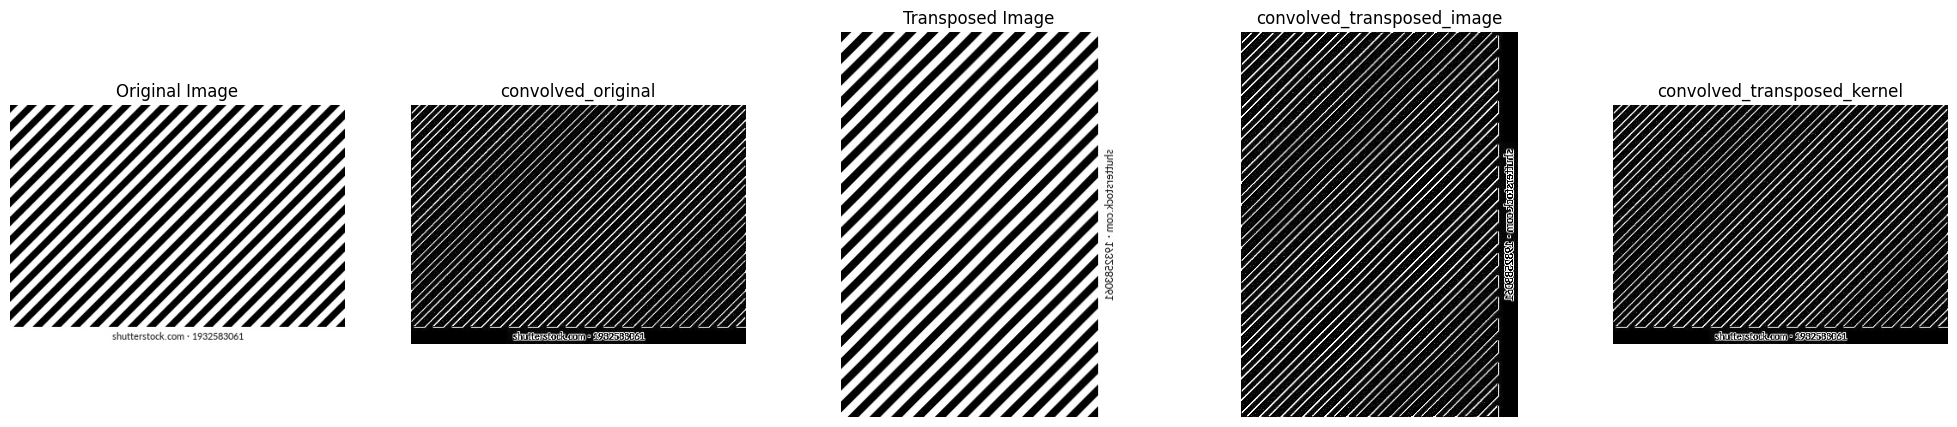

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('diagonal_stripes_pattern.jpg', cv2.IMREAD_GRAYSCALE)



# Define a Kernel (e.g., simple edge detection kernel)
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]], dtype=np.float32)

# Function to convolve image with kernel
def convolve(image, kernel):
    return cv2.filter2D(image, -1, kernel)

# Apply Kernel to Original Image
convolved_original = convolve(image, kernel)

# Transpose the Image (Flip rows and columns)
image_transposed = np.transpose(image)

# Apply the Kernel to the Transposed Image
convolved_transposed_image = convolve(image_transposed, kernel)

# Transpose the Kernel and Apply to Original Image
kernel_transposed = np.transpose(kernel)
convolved_transposed_kernel = convolve(image, kernel_transposed)

# Visualization
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(convolved_original, cmap='gray')
axes[1].set_title('convolved_original')
axes[1].axis('off')
axes[2].imshow(image_transposed, cmap='gray')
axes[2].set_title('Transposed Image')
axes[2].axis('off')
axes[3].imshow(convolved_transposed_image, cmap='gray')
axes[3].set_title('convolved_transposed_image')
axes[3].axis('off')
axes[4].imshow(convolved_transposed_kernel, cmap='gray')
axes[4].set_title('convolved_transposed_kernel')
axes[4].axis('off')

plt.show()

In [ ]:
def conv2d(X, K):
    h, w = K.shape
    Y = np.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = np.sum(X[i:i+h, j:j+w] * K)
    return Y

K = np.array([[1.0, -1.0]])
X = np.eye(6, 7)


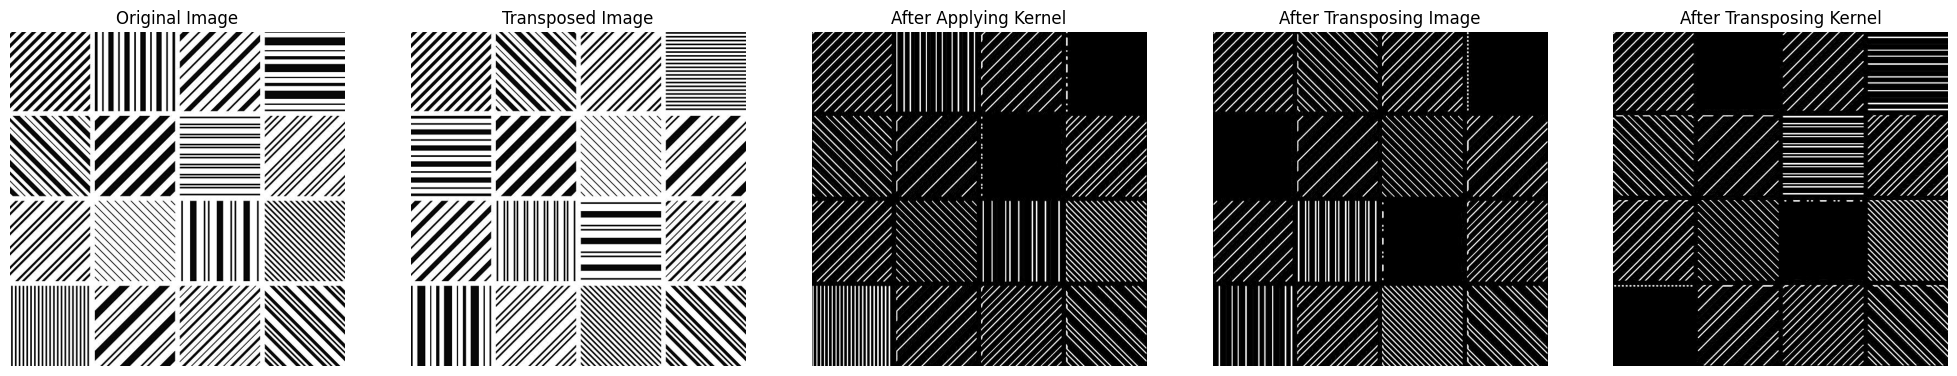

In [15]:
image = cv2.imread('diagonal_stripes_pattern_1.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.array([[1, 0,-1], [1, 0,-1]], dtype=np.float32)
# Function to convolve image with kernel
def convolve(image, kernel):
    return cv2.filter2D(image, -1, kernel)
# Apply Kernel to Original Image
convolved_original = convolve(image, kernel)

# Transpose the Image (Flip rows and columns)
image_transposed = np.transpose(image)

# Apply the Kernel to the Transposed Image
convolved_transposed_image = convolve(image_transposed, kernel)

# Transpose the Kernel and Apply to Original Image
kernel_transposed = np.transpose(kernel)
convolved_transposed_kernel = convolve(image, kernel_transposed)

# Visualization
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_transposed, cmap='gray')
axes[1].set_title('Transposed Image')
axes[1].axis('off')

axes[2].imshow(convolved_original, cmap='gray')
axes[2].set_title('After Applying Kernel')
axes[2].axis('off')

axes[3].imshow(convolved_transposed_image, cmap='gray')
axes[3].set_title('After Transposing Image')
axes[3].axis('off')

axes[4].imshow(convolved_transposed_kernel, cmap='gray')
axes[4].set_title('After Transposing Kernel')
axes[4].axis('off')

plt.show()


* Observations:

- After Transposing Diagonal images have same direction of digonal line,  ut horizontal lines become vertical and vertical becomes horizontal.
- On applying kernel ([1,0,-1] is non -syymetric and it is for vertical lines detection) : we can see all places where horizontal lines are there got black.
- On applying Transpose kernel - We can see all vertical lines have disappeared.

### 2: Improve last week convolve function with padding and strides on 3D

Implement a function that performs a 3D convolution operation on an image with given padding and stride parameters. Your function should handle both zero-padding and valid (no padding) cases.

Also answer below:

* How does the output size change with different padding and stride values? Explain the relationship mathematically.

* Try implementing using Pytorch

### Solution

Shape of input image: (5, 5, 3)
Shape of kernel: (3, 3, 3)
Shape of convolution output: (3, 3, 3)


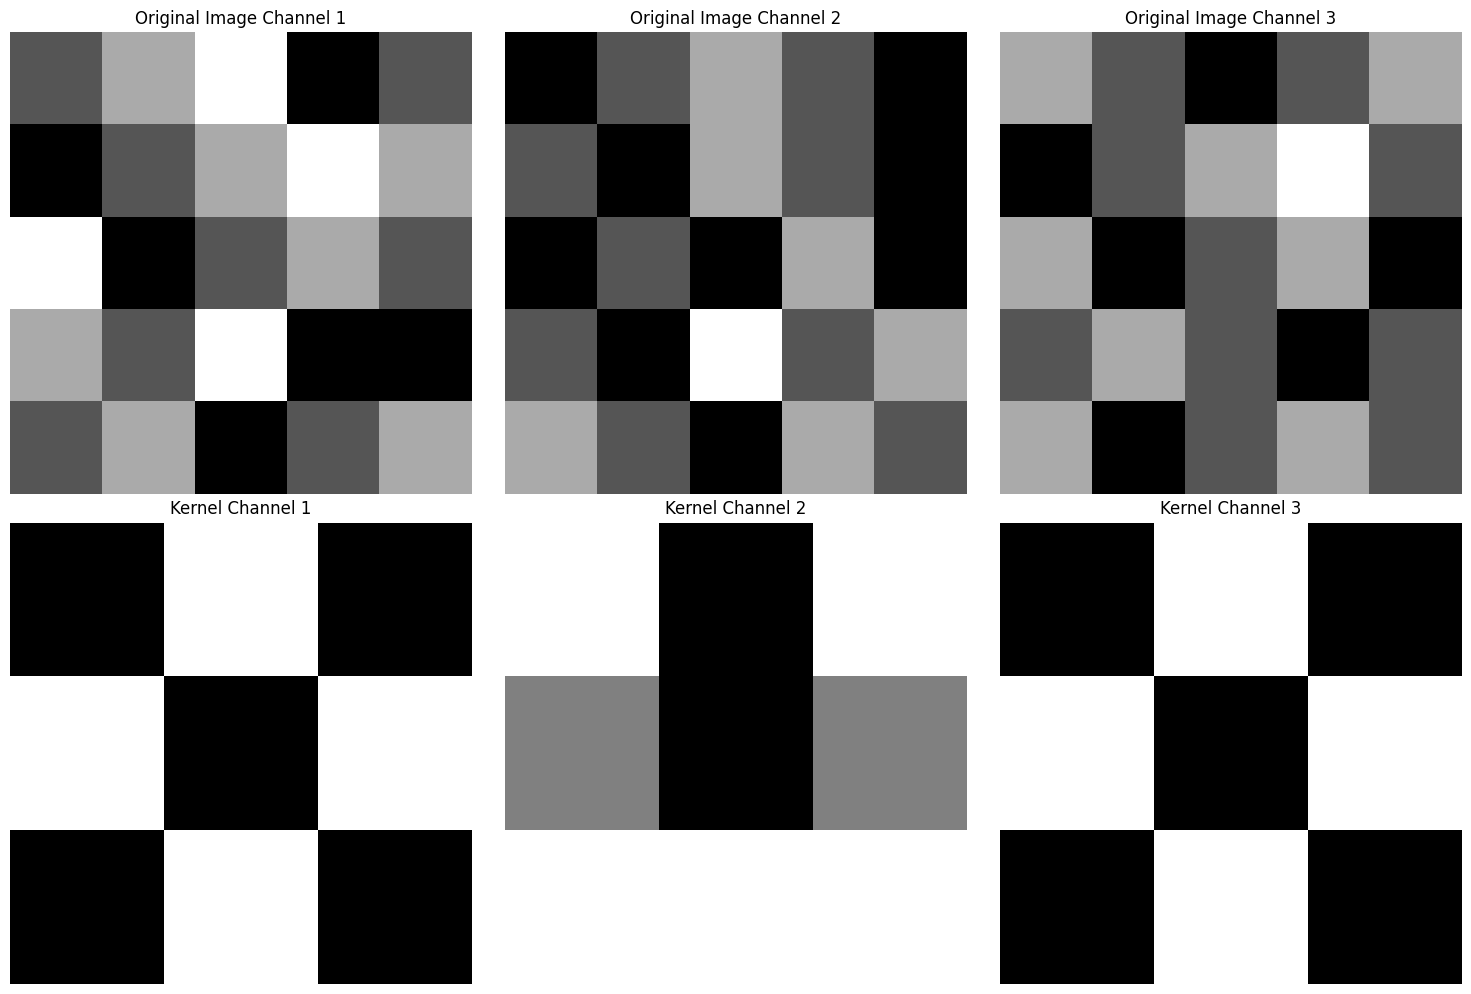

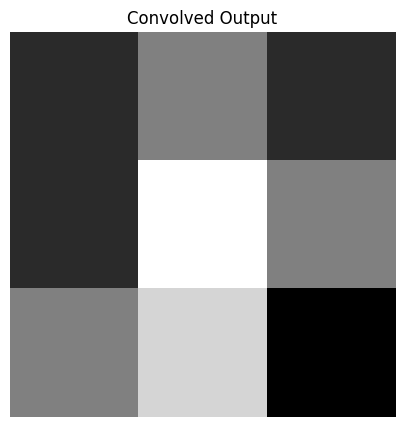

In [7]:
import numpy as np
import matplotlib.pyplot as plt



def convolve_rgb(image, kernel, stride=1, padding=0):
    image_h, image_w, image_c = image.shape
    kernel_h, kernel_w, kernel_c = kernel.shape

    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='constant')

    # Calculate the dimensions of the output image
    output_h = (image_h - kernel_h + 2 * padding) // stride + 1
    output_w = (image_w - kernel_w + 2 * padding) // stride + 1

    # Initialize the output image
    output = np.zeros((output_h, output_w, image_c), dtype=np.uint8)

    for k in range(image_c):
      for i in range(0, output_h ):
        for j in range(0, output_w):
            output[i, j, k] = np.sum(image[i*stride:i*stride+kernel_h, j*stride:j*stride+kernel_w, k] * kernel[:,:,k])
    return output



# Define a simple 5x5x3 RGB image (3 channels)
image = np.array([
    [[1, 0, 2], [2, 1, 1], [3, 2, 0], [0, 1, 1], [1, 0, 2]],
    [[0, 1, 0], [1, 0, 1], [2, 2, 2], [3, 1, 3], [2, 0, 1]],
    [[3, 0, 2], [0, 1, 0], [1, 0, 1], [2, 2, 2], [1, 0, 0]],
    [[2, 1, 1], [1, 0, 2], [3, 3, 1], [0, 1, 0], [0, 2, 1]],
    [[1, 2, 2], [2, 1, 0], [0, 0, 1], [1, 2, 2], [2, 1, 1]]
])

# Define a 3x3x3 filter (kernel) for each channel (RGB)
kernel = np.array([
    [[0, 1, 0], [1, -1, 1], [0, 1, 0]],
    [[1, 0, 1], [0, -1, 0], [1, 0, 1]],
    [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
])

# Apply the convolution with padding and stride
output = convolve_rgb(image, kernel, padding=1, stride=2)

# Print shapes
print("Shape of input image:", image.shape)
print("Shape of kernel:", kernel.shape)
print("Shape of convolution output:", output.shape)

# Visualization of the image, kernel, and output
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot the original image slices
for i in range(3):
    axes[0, i].imshow(image[:, :, i], cmap='gray')
    axes[0, i].set_title(f'Original Image Channel {i+1}')
    axes[0, i].axis('off')

# Plot the kernel slices
for i in range(3):
    axes[1, i].imshow(kernel[:, :, i], cmap='gray')
    axes[1, i].set_title(f'Kernel Channel {i+1}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

# Visualization of the convolved output
plt.figure(figsize=(7, 5))
plt.imshow(output[:, :, 0], cmap='gray')
plt.title('Convolved Output')
plt.axis('off')
plt.show()


### 3. Implement Different padding

* Mirror
* Reflect
*


Improve above convolution code to apply mirror padding

Mirror padding: padding where the border values are simply mirrored to extend tensors.


Eg. -


Original :
```
[[1, 2, 5, 9, 6],
 [4, 7, 0, 1, 2],
 [3, 4, 5, 6, 7],
 [0, 1, 2, 3, 4],
 [5, 6, 7, 0, 1]]
```


Mirror Padded with size 2:
```
[[5 4 3 4 5 6 7 6 5]
 [0 7 4 7 0 1 2 1 0]
 [5 2 1 2 5 9 6 9 5]
 [0 7 4 7 0 1 2 1 0]
 [5 4 3 4 5 6 7 6 5]
 [2 1 0 1 2 3 4 3 2]
 [7 6 5 6 7 0 1 0 7]
 [2 1 0 1 2 3 4 3 2]
 [5 4 3 4 5 6 7 6 5]]
 ```


Replicate Padded with size 2:
```
[[1 1 2 3 4 5 5]
 [1 1 2 3 4 5 5]
 [6 6 7 0 1 2 2]
 [3 3 4 5 6 7 7]
 [0 0 1 2 3 4 4]
 [5 5 6 7 0 1 1]
 [5 5 6 7 0 1 1]]
 ```







### Solution

In [5]:
import numpy as np

image_array = np.array([[1, 2, 5, 9, 6],
                        [4, 7, 0, 1, 2],
                        [3, 4, 5, 6, 7],
                        [0, 1, 2, 3, 4],
                        [5, 6, 7, 0, 1]])

np.pad(image_array, pad_width=2, mode='reflect')
np.pad(image_array, pad_width=1, mode='edge')

array([[1, 1, 2, 5, 9, 6, 6],
       [1, 1, 2, 5, 9, 6, 6],
       [4, 4, 7, 0, 1, 2, 2],
       [3, 3, 4, 5, 6, 7, 7],
       [0, 0, 1, 2, 3, 4, 4],
       [5, 5, 6, 7, 0, 1, 1],
       [5, 5, 6, 7, 0, 1, 1]])

###4. Downsample Image Using Convolve and Slicing

* **Convolution**:
    - Choose an appropriate kernel size and stride value that will downsample the image from size 𝑚 × n to 𝑚/2 × n/2.

* **Slicing**:

    - Downsample the image by concatenating alternate slices (i.e., take every second row and column to reduce the image size).


* Compare the visual quality and computational efficiency of the downsampled images.


In [5]:
!wget -O hill.jpeg "https://www.shutterstock.com/image-photo/dodgeville-wisconsin-usa-08312022-contoured-600nw-2199893641.jpg"

--2024-11-16 09:09:59--  https://www.shutterstock.com/image-photo/dodgeville-wisconsin-usa-08312022-contoured-600nw-2199893641.jpg
Resolving www.shutterstock.com (www.shutterstock.com)... 3.163.125.108, 3.163.125.2, 3.163.125.27, ...
Connecting to www.shutterstock.com (www.shutterstock.com)|3.163.125.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118544 (116K) [image/jpeg]
Saving to: ‘hill.jpeg’

hill.jpeg           100%[===================>] 115.77K  --.-KB/s    in 0.02s   

2024-11-16 09:09:59 (5.75 MB/s) - ‘hill.jpeg’ saved [118544/118544]



(400, 600, 3)
[array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]]), array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]]), array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])]


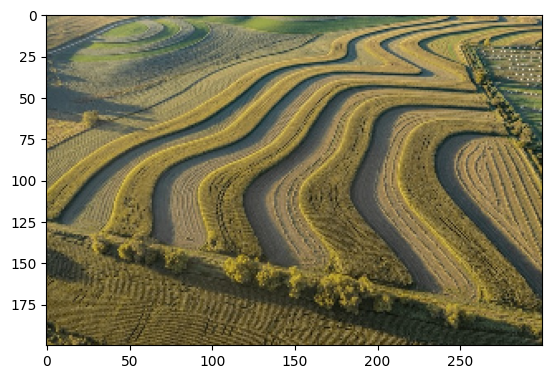

In [8]:
import numpy as p
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('hill.jpeg')
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(rgb_img.shape)
def create_identity_kernel(size):
    kernel = np.zeros((size, size))
    center = size // 2
    kernel[center, center] = 1
    return kernel

kernel_size = 3
print([create_identity_kernel(kernel_size)] * 3)
kernel = np.stack([create_identity_kernel(kernel_size)] * 3, axis=-1)
output = convolve_rgb(rgb_img, kernel, stride=2, padding=1)
plt.imshow(output)
plt.show()

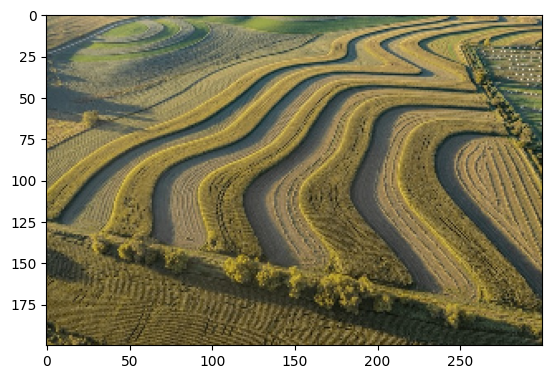

In [9]:
image = cv2.imread('hill.jpeg')
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
downsampled_image = rgb_img[::2, ::2, :]
plt.imshow(downsampled_image)
plt.show()

## 5. Perform different Operations on 3-Channel images

* Color Filters : Red, Blue, Green
* Image Operations : Contrast, Brightness, Color Balacing


Note: Can use scikit-image to import images

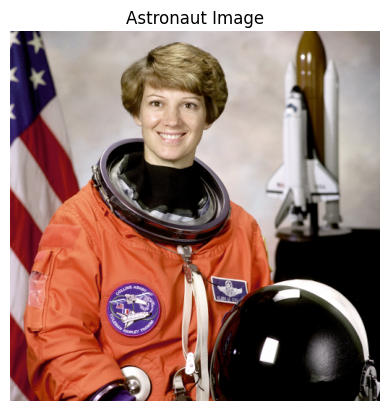

Image shape: (512, 512, 3)


In [ ]:
import matplotlib.pyplot as plt
from skimage import data, io

# Load a sample image from skimage's data module
image = data.astronaut()  # This is a 3-channel (RGB) image

# Display the image
plt.imshow(image)
plt.title('Astronaut Image')
plt.axis('off')  # Hide axis
plt.show()

# Check the shape of the image
print(f"Image shape: {image.shape}")  # Should be something like (512, 512, 3)


### Solution

(-0.5, 511.5, 511.5, -0.5)

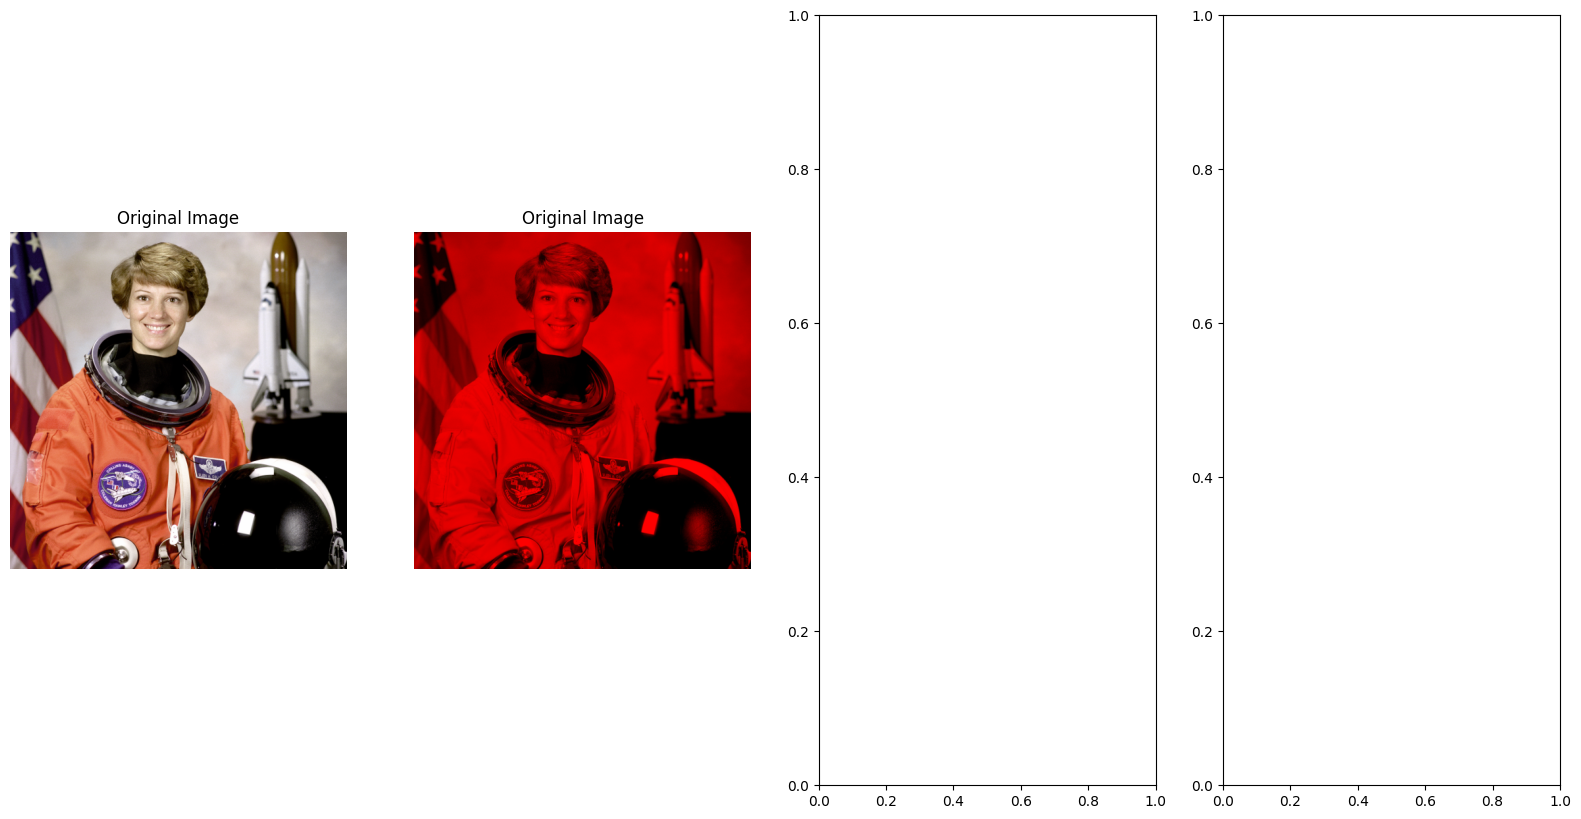

In [19]:
import matplotlib.pyplot as plt
from skimage import data, io

# Load a sample image from skimage's data module
image = data.astronaut()  # This is a 3-channel (RGB) image


red_kernel = np.array([1, 0, 0])
green_kernel = np.array([0, 1, 0])
blue_kernel = np.array([0, 0, 1])

red_img = image * red_kernel
green_img = image * green_kernel
blue_img = image * blue_kernel

fig, axes = plt.subplots(1, 4, figsize=(20, 10))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(red_img)
axes[1].set_title('Original Image')
axes[1].axis('off')

(-0.5, 511.5, 511.5, -0.5)

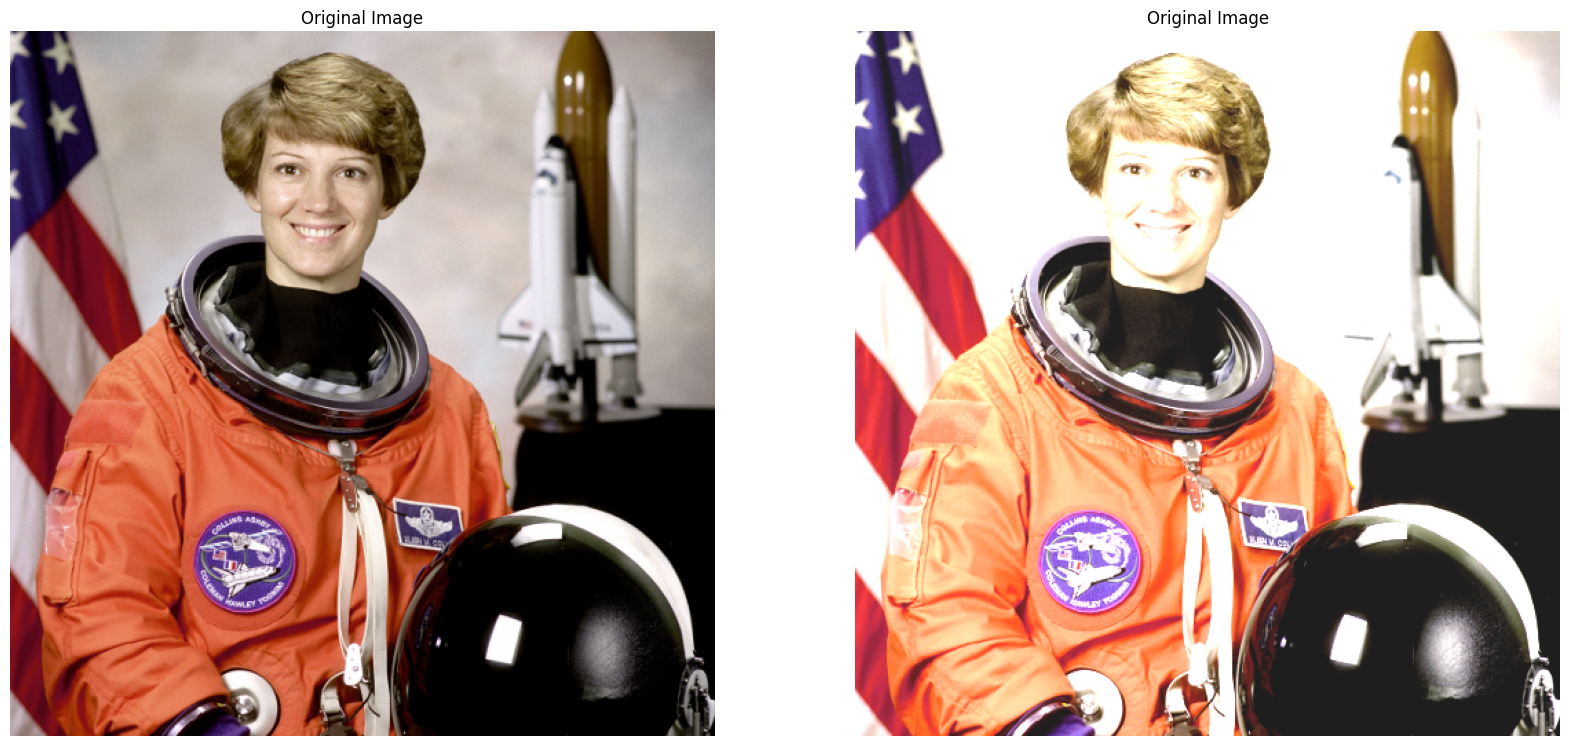

In [26]:
def bright_contrast(bright, contrast, image):
  result = image * contrast + bright
  result = np.clip(result, 0, 255)

  return result.astype(np.uint8)


output = bright_contrast(30, 1.5, image)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(output)
axes[1].set_title('Original Image')
axes[1].axis('off')

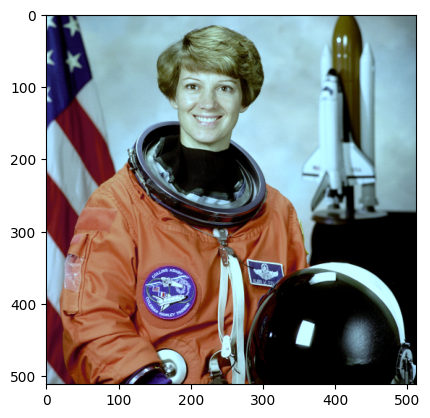

In [29]:
def white_balance(image):
  r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]
  avg_r = np.mean(r)
  avg_g = np.mean(g)
  avg_b = np.mean(b)
  avg = (avg_r + avg_g + avg_b) / 3
  r = r * (avg / avg_r)
  g = g * (avg / avg_g)
  b = b * (avg / avg_b)
  output = np.clip(np.stack([r,g,b], axis=-1), 0, 255)
  return output.astype(np.uint8)



output = white_balance(image)
plt.imshow(output)

## 6. Create a basic Convolutional Neural Network (CNN) architecture using Keras with TensorFlow. The network should have the following specifications:

1. **Layer Configuration**:
   - **1st Layer**: Convolutional layer with 256 filters, a kernel size of 3x3, and ReLU activation.
   - **2nd Layer**: Convolutional layer with 128 filters, a kernel size of 3x3, and ReLU activation.
   - **3rd Layer**: Convolutional layer with 64 filters, a kernel size of 3x3, and ReLU activation.
   - **4th Layer**: Convolutional layer with 281 filters, a kernel size of 3x3, and ReLU activation.
   - **5th Layer**: Convolutional layer with 256 filters, a kernel size of 3x3, and ReLU activation.

2. **Batch Normalization**:
   - Apply Batch Normalization after the 1st, 3rd, and 5th convolutional layers.

3. **Additional Requirements**:
   - Use padding='same' for all convolutional layers to maintain spatial dimensions.
   - Include a MaxPooling2D layer after each convolutional layer (except the last) to reduce spatial dimensions.
   - Add a Flatten layer followed by a Dense layer with 10 units and a softmax activation for classification.

Provide the complete code for building this CNN architecture in Keras with TensorFlow.


### Solution

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D, Flatten, Dense, Input


model = Sequential()

model.add(Input(shape= (32, 32, 3)))

model.add(   Conv2D(256, (3,3), padding='same')   )
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D((2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(ReLU())
model.add(MaxPooling2D((2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D((2, 2)))

# 4th Convolutional Layer
model.add(Conv2D(281, (3, 3), padding='same'))
model.add(ReLU())
model.add(MaxPooling2D((2, 2)))

# 5th Convolutional Layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



# Display model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 281)           │         162,137 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 4, 4, 281)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 281)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 256)           │         647,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           2,5

 Total params: 1,190,691 (4.54 MB)

 Trainable params: 1,189,539 (4.54 MB)

 Non-trainable params: 1,152 (4.50 KB)